In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Carga de Datos
El primer paso fue cargar el dataset para analizarlo y entender su estructura. La función shape permite ver rápidamente la cantidad de filas y columnas, lo cual es útil para tener una idea inicial del tamaño del dataset. Además, se realizó una inspección de los tipos de datos para asegurar que cada columna tuviera el tipo correcto, lo que es crucial para evitar errores en los análisis subsecuentes.

In [153]:
# Cargar los datos
import os
print("Directorio actual:", os.getcwd())
db_name = './database.csv'
df_medical = pd.read_csv(db_name, sep=',', encoding="ISO-8859-1")

# Variables categóricas
categorical_vars = [
    "Sexo", 
    "Modo_Llegada", 
    "Lesion", 
    "Estado_Mental", 
    "Dolor", 
    "KTAS_enfermera", 
    "Disposicion", 
    "KTAS_experto", 
    "Grupo_De_Error", 
    "Error_Triaje"
]

# Variables numéricas
numeric_vars = [
    "Grupo",
    "Edad", 
    "dolor_NRS", 
    "SBP", 
    "DBP", 
    "HR", 
    "RR", 
    "BT", 
    "Saturacion", 
    "Duracion_Estancia_Min", 
    "Duracion_KTAS_Min"
]

# Variables de texto
text_vars = [ 
    "Queja_Principal", 
    "Diagnostico_En_Urgencias"
]


# Inspección inicial de los datos
print("Dimensiones del dataset:", df_medical.shape)
display(df_medical.sample(5))
print("Data types: ")
print(df_medical.dtypes)

Directorio actual: /Users/sebastiangaona/Desktop/2024-2/BI/Lab_1
Dimensiones del dataset: (1000, 23)


,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,...,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
309,2,2,46,3,1,diarrhea,1,0,#BOÃ!,150.0,...,36.4,99.0,3,"Chronic kidney disease, unspecified",2,3,0,9963,"2,00",0
412,2,2,40,3,1,For IV injection,1,1,2,110.0,...,36.0,98.0,5,Polyneuropathy in neoplastic disease (C00-D48+),1,5,0,54,"2,00",0
886,2,1,62,3,1,ant. chest pain,1,1,3,150.0,...,37.4,98.0,2,"Pneumonia, unspecified",1,2,0,607,"5,00",0
609,2,2,47,3,2,Foreign Body Sense,1,1,6,120.0,...,36.3,96.0,3,Foreign body in oesophagus,1,3,0,314,"3,00",0
220,2,2,58,3,1,Left chest pain,1,1,6,160.0,...,36.5,98.0,2,"Angina pectoris, unspecified",2,2,0,10150,"4,00",0


Data types: 
Grupo                         int64
Sexo                          int64
Edad                          int64
Modo_Llegada                  int64
Lesion                        int64
Queja_Principal              object
Estado_Mental                 int64
Dolor                         int64
dolor_NRS                    object
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturacion                  float64
KTAS_enfermera                int64
Diagnostico_En_Urgencias     object
Disposicion                   int64
KTAS_experto                  int64
Grupo_De_Error                int64
Duracion_Estancia_Min         int64
Duracion_KTAS_Min            object
Error_Triaje                  int64
dtype: object


In [154]:
# Revisar valores únicos en variables categóricas
for var in categorical_vars:
    print(f"\nValores únicos en {var}: {df_medical[var].unique()}")


Valores únicos en Sexo: [2 1]

Valores únicos en Modo_Llegada: [2 4 3 1 6 5 7]

Valores únicos en Lesion: [1 2]

Valores únicos en Estado_Mental: [1 4 2 3]

Valores únicos en Dolor: [1 0]

Valores únicos en KTAS_enfermera: [2 3 4 1 5]

Valores únicos en Disposicion: [2 7 1 5 6 3 4]

Valores únicos en KTAS_experto: [2 3 4 1 5]

Valores únicos en Grupo_De_Error: [0 4 1 2 6 7 8 5 3 9]

Valores únicos en Error_Triaje: [0 2 1]


In [155]:
# Convertir columnas que deberían ser numéricas
df_medical['dolor_NRS'] = pd.to_numeric(df_medical['dolor_NRS'], errors='coerce')
df_medical['Duracion_KTAS_Min'] = pd.to_numeric(df_medical['Duracion_KTAS_Min'].str.replace(",", "."), errors='coerce')

# Confirmar cambios en los tipos de datos
print("\nTipos de datos después de la conversión:")
print(df_medical.dtypes)



Tipos de datos después de la conversión:
Grupo                         int64
Sexo                          int64
Edad                          int64
Modo_Llegada                  int64
Lesion                        int64
Queja_Principal              object
Estado_Mental                 int64
Dolor                         int64
dolor_NRS                   float64
SBP                         float64
DBP                         float64
HR                          float64
RR                          float64
BT                          float64
Saturacion                  float64
KTAS_enfermera                int64
Diagnostico_En_Urgencias     object
Disposicion                   int64
KTAS_experto                  int64
Grupo_De_Error                int64
Duracion_Estancia_Min         int64
Duracion_KTAS_Min           float64
Error_Triaje                  int64
dtype: object


### Análisis de la Calidad de los Datos
#### Criterio de calidad: Completitud (Verificar si hay datos faltantes)


In [156]:
# Identificar datos faltantes
missing_data = df_medical.isnull().sum()
missing_percentage = (missing_data / len(df_medical)) * 100

# Reportar resultados
print("\nCompletitud de los datos:")
print(pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Porcentaje Faltante (%)': missing_percentage
}))


Completitud de los datos:
                          Valores Faltantes  Porcentaje Faltante (%)
Grupo                                     0                      0.0
Sexo                                      0                      0.0
Edad                                      0                      0.0
Modo_Llegada                              0                      0.0
Lesion                                    0                      0.0
Queja_Principal                           0                      0.0
Estado_Mental                             0                      0.0
Dolor                                     0                      0.0
dolor_NRS                               440                     44.0
SBP                                      17                      1.7
DBP                                      21                      2.1
HR                                       12                      1.2
RR                                       15                      1.5
BT     

#### Criterio de calidad: Consistencia (Validar rangos y relaciones)
Validamos que los valores estén dentro de rangos esperados y que las relaciones entre las columnas sean coherentes.


In [157]:
# 1. Edad debería estar en un rango razonable (por ejemplo, 0-120 años)
edad_invalida = df_medical[(df_medical['Edad'] < 0) | (df_medical['Edad'] > 120)]

# 2. La presión sistólica (SBP) debe ser mayor que la diastólica (DBP)
presion_invalida = df_medical[df_medical['SBP'] <= df_medical['DBP']]

# Reportar resultados
print("\nDatos con edades fuera del rango esperado:")
print(edad_invalida)

print("\nDatos con inconsistencias en la presión arterial (SBP <= DBP):")
print(presion_invalida)


Datos con edades fuera del rango esperado:
Empty DataFrame
Columns: [Grupo, Sexo, Edad, Modo_Llegada, Lesion, Queja_Principal, Estado_Mental, Dolor, dolor_NRS, SBP, DBP, HR, RR, BT, Saturacion, KTAS_enfermera, Diagnostico_En_Urgencias, Disposicion, KTAS_experto, Grupo_De_Error, Duracion_Estancia_Min, Duracion_KTAS_Min, Error_Triaje]
Index: []

[0 rows x 23 columns]

Datos con inconsistencias en la presión arterial (SBP <= DBP):
Empty DataFrame
Columns: [Grupo, Sexo, Edad, Modo_Llegada, Lesion, Queja_Principal, Estado_Mental, Dolor, dolor_NRS, SBP, DBP, HR, RR, BT, Saturacion, KTAS_enfermera, Diagnostico_En_Urgencias, Disposicion, KTAS_experto, Grupo_De_Error, Duracion_Estancia_Min, Duracion_KTAS_Min, Error_Triaje]
Index: []

[0 rows x 23 columns]


#### Criterio de calidad: Validez (Valores en variables categóricas)

Comprobamos que los valores de las variables categóricas estén dentro de las categorías permitidas.


In [158]:
expected_values = {
    'Sexo': [1, 2],
    'Modo_Llegada': [1, 2, 3, 4, 5],
    'Lesion': [1, 2],
    'Estado_Mental': [1, 2, 3, 4],
    'Dolor': [0, 1],
    'KTAS_enfermera': [1, 2, 3, 4, 5],
    'Disposicion': [1, 2, 3, 4, 5, 6, 7],
    'KTAS_experto': [1, 2, 3, 4, 5],
    'Grupo_De_Error': [0, 1, 2, 3, 4, 5],
    'Error_Triaje': [0, 1]
}

for column, valid_values in expected_values.items():
    invalid_entries = df_medical[~df_medical[column].isin(valid_values)]
    if not invalid_entries.empty:
        print(f"\nValores inválidos en la columna {column}:")
        print(invalid_entries)


Valores inválidos en la columna Modo_Llegada:
     Grupo  Sexo  Edad  Modo_Llegada  Lesion         Queja_Principal  \
59       1     1    73             6       1               dizziness   
348      1     1    86             6       1                 dyspnea   
373      1     1    36             6       2             Injury, Leg   
443      1     1    51             6       1        Vaginal Bleeding   
471      1     1    73             6       1        ocular pain, Lt.   
496      1     1    82             6       1  perm cath. malfunction   
790      1     1    53             6       1               dizziness   
861      2     2    67             7       1               dizziness   

     Estado_Mental  Dolor  dolor_NRS    SBP  ...    BT  Saturacion  \
59               1      0        NaN  136.0  ...  36.5         NaN   
348              1      0        NaN  124.0  ...  36.4         NaN   
373              1      1        7.0  135.0  ...  36.6         NaN   
443              1      

#### Criterio de calidad: Unicidad (Buscar duplicados)
Nos aseguramos de que no haya filas duplicadas en el dataset.

In [159]:
# Identificar filas duplicadas
duplicated_rows = df_medical[df_medical.duplicated()]

# Reportar resultados
print("\nFilas duplicadas en el DataFrame:")
print(duplicated_rows)


Filas duplicadas en el DataFrame:
     Grupo  Sexo  Edad  Modo_Llegada  Lesion           Queja_Principal  \
967      1     1    28             3       1              Facial Palsy   
968      2     1    49             3       1           ant. chest pain   
969      2     2    47             3       1                  headache   
970      2     1    72             3       1  diffuse chest discomfort   
971      1     2    29             1       2              Wrist Injury   
972      2     1    41             3       2                Open Wound   
973      1     1    57             3       1         Discomfort, Chest   
974      1     2    78             3       1                 dizziness   
975      2     2    77             4       1         AVF site bleeding   
976      2     2    41             3       1                  leg pain   
977      1     1    82             3       1                    ?? ???   
978      2     1    75             3       1           ant. chest pain   
979

### Limpieza de Datos
#### Solución a Consistencia (Valores Nulos)
Se definieron estas reglas de imputación para asegurar que los valores faltantes en el dataset sean reemplazados de manera coherente con el contexto clínico de cada paciente. Al utilizar la mediana y la moda dentro de grupos específicos, se preservan las características distintivas de cada grupo, evitando distorsiones que podrían resultar de una imputación global. Esto permite mantener la integridad de los datos y mejorar la precisión en análisis posteriores.

In [160]:
# 3. Limpieza de los Datos
# -----------------------------------------

# Imputación específica basada en la naturaleza de los datos
for var in categorical_vars:
    df_medical[var].fillna(df_medical[var].mode()[0], inplace=True)

# Para la variable 'Edad'
df_medical['Edad'].fillna(df_medical['Edad'].median(), inplace=True)

# Imputación basada en grupos para 'dolor_NRS' usando la mediana dentro de grupos similares
df_medical['dolor_NRS'] = df_medical.groupby('Grupo')['dolor_NRS'].transform(lambda x: x.fillna(x.median()))

# Imputación de signos vitales con la mediana según el 'Sexo' y 'Estado_Mental'
vital_signs = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion']
for var in vital_signs:
    df_medical[var] = df_medical.groupby(['Sexo', 'Estado_Mental'])[var].transform(lambda x: x.fillna(x.median()))

# Imputación de 'Duración_Estancia_Min' y 'Duración_KTAS_Min' con la mediana
df_medical['Duracion_Estancia_Min'].fillna(df_medical['Duracion_Estancia_Min'].median(), inplace=True)
df_medical['Duracion_KTAS_Min'].fillna(df_medical['Duracion_KTAS_Min'].median(), inplace=True)

# Confirmar que no quedan valores faltantes
print("\nValores faltantes después de la imputación:")
print(df_medical.isnull().sum())




Valores faltantes después de la imputación:
Grupo                       0
Sexo                        0
Edad                        0
Modo_Llegada                0
Lesion                      0
Queja_Principal             0
Estado_Mental               0
Dolor                       0
dolor_NRS                   0
SBP                         0
DBP                         0
HR                          0
RR                          0
BT                          0
Saturacion                  0
KTAS_enfermera              0
Diagnostico_En_Urgencias    1
Disposicion                 0
KTAS_experto                0
Grupo_De_Error              0
Duracion_Estancia_Min       0
Duracion_KTAS_Min           0
Error_Triaje                0
dtype: int64


/var/folders/4l/ns658b_x7jq0xzx004lrrl_w0000gn/T/ipykernel_1584/1630448660.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_medical[var].fillna(df_medical[var].mode()[0], inplace=True)
/var/folders/4l/ns658b_x7jq0xzx004lrrl_w0000gn/T/ipykernel_1584/1630448660.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

#### Solución a la Consistencia: Corrección de datos fuera de rango y relaciones incoherentes
Para garantizar la integridad y coherencia del dataset, se eliminaron registros con datos evidentemente incorrectos, como edades fuera del rango biológicamente plausible (0 a 120 años) y casos donde la presión arterial sistólica (SBP) es menor o igual que la diastólica (DBP), lo cual es clínicamente imposible. Estas medidas permiten mantener la calidad del análisis y evitar conclusiones erróneas basadas en datos anómalos.

In [161]:
# 1. Edad fuera de rango:
# En este caso, se eliminarán registros con edad inválida.
df_medical = df_medical[(df_medical['Edad'] >= 0) & (df_medical['Edad'] <= 120)]

# 2. Inconsistencia SBP <= DBP: Se eliminarán registros con esta inconsistencia.
df_medical = df_medical[df_medical['SBP'] > df_medical['DBP']]

#### Solución a la Unicidad: Manejo de duplicados
Se eliminaron filas duplicadas en el dataset para asegurar la unicidad de los datos y evitar el sesgo en los análisis posteriores. La eliminación de duplicados garantiza que cada registro en el dataset represente un caso único, lo que mejora la precisión y validez de los resultados obtenidos.

In [162]:

# Eliminación de filas duplicadas en todo el dataset.
df_medical.drop_duplicates(inplace=True)

# Confirmar que no quedan duplicados
print("\nVerificación de duplicados después de la limpieza:")
print(df_medical.duplicated().sum())


Verificación de duplicados después de la limpieza:
0


#### Solución a la Validación de Valores Categóricos

Se eliminaron registros con valores categóricos inválidos para asegurar la integridad y coherencia de los datos. Este proceso garantiza que solo se consideren los valores esperados en cada columna, lo que previene errores y sesgos en los análisis al mantener la consistencia de las categorías definidas en el dataset.

In [163]:
# Aquí eliminaremos registros con valores inválidos.

for column, valid_values in expected_values.items():
    df_medical = df_medical[df_medical[column].isin(valid_values)]

In [164]:
# Detección y manejo de outliers
# ------------------------------
# Identificamos outliers utilizando el rango intercuartílico (IQR) y hacemos capping.

Q1 = df_medical[numeric_vars].quantile(0.25)
Q3 = df_medical[numeric_vars].quantile(0.75)
IQR = Q3 - Q1

# Capping de outliers
#for var in numeric_vars:
 #   lower_bound = Q1[var] - 1.5 * IQR[var]
  #  upper_bound = Q3[var] + 1.5 * IQR[var]
   # df_medical[var] = np.where(df_medical[var] < lower_bound, lower_bound, df_medical[var])
    #df_medical[var] = np.where(df_medical[var] > upper_bound, upper_bound, df_medical[var])


#### Transformación  (Normalización)
Se aplicó la normalización de columnas numéricas para estandarizar los datos y facilitar comparaciones entre variables con diferentes escalas. Esto ayuda a mejorar el rendimiento de modelos estadísticos y de machine learning, asegurando que ninguna variable numérica domine debido a su rango o magnitud. Después de la normalización, se confirmó la transformación y se guardó el dataset limpio para futuros análisis.

In [165]:
# Normalización de columnas numéricas
# -----------------------------------
scaler = StandardScaler()
df_medical[numeric_vars] = scaler.fit_transform(df_medical[numeric_vars])

# Confirmar transformaciones
print("\nDatos después de la normalización:")
print(df_medical.describe())

num_registros = df_medical.shape[0]
print("Número de registros:", num_registros)

# Guardar el dataset limpio
df_medical.to_csv('df_medical_cleaned2.csv', index=False)
print("\nEl dataset limpio ha sido guardado como 'df_medical_cleaned.csv'.")


Datos después de la normalización:
              Grupo       Sexo          Edad  Modo_Llegada      Lesion  \
count  8.530000e+02  853.00000  8.530000e+02    853.000000  853.000000   
mean  -4.997956e-17    1.52286  2.915474e-17      2.778429    1.213365   
std    1.000587e+00    0.49977  1.000587e+00      0.721178    0.409923   
min   -8.899533e-01    1.00000 -1.893354e+00      1.000000    1.000000   
25%   -8.899533e-01    1.00000 -8.772919e-01      2.000000    1.000000   
50%   -8.899533e-01    2.00000  1.387705e-01      3.000000    1.000000   
75%    1.123655e+00    2.00000  7.992111e-01      3.000000    1.000000   
max    1.123655e+00    2.00000  2.069289e+00      5.000000    2.000000   

       Estado_Mental       Dolor     dolor_NRS           SBP           DBP  \
count     853.000000  853.000000  8.530000e+02  8.530000e+02  8.530000e+02   
mean        1.089097    0.569754 -3.956715e-17 -4.217025e-17 -7.496934e-17   
std         0.407138    0.495401  1.000587e+00  1.000587e+00  1

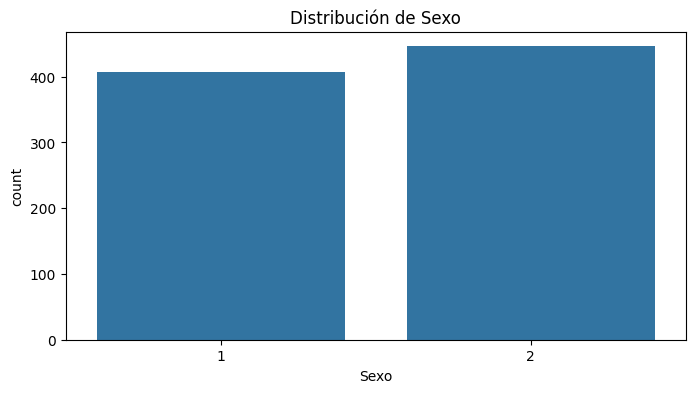

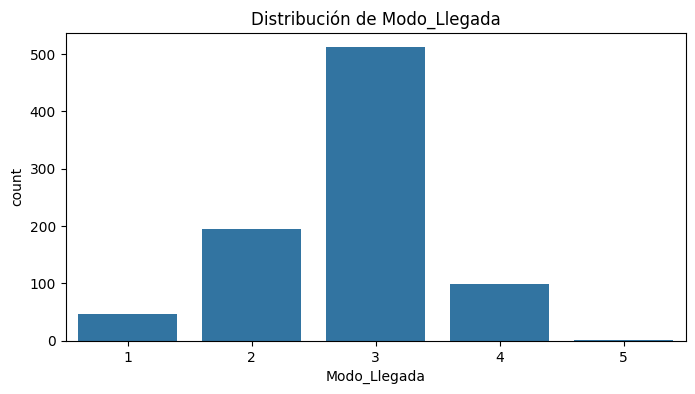

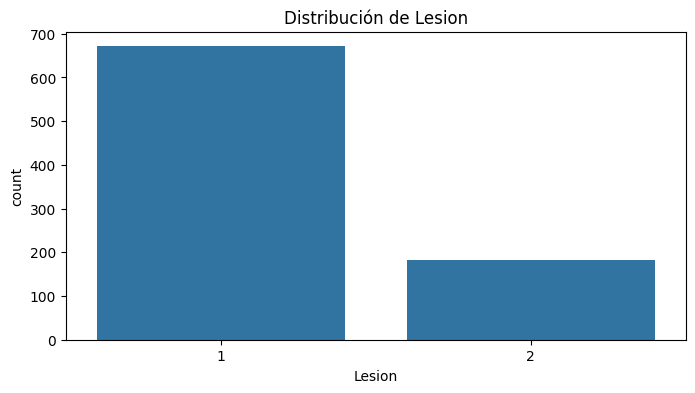

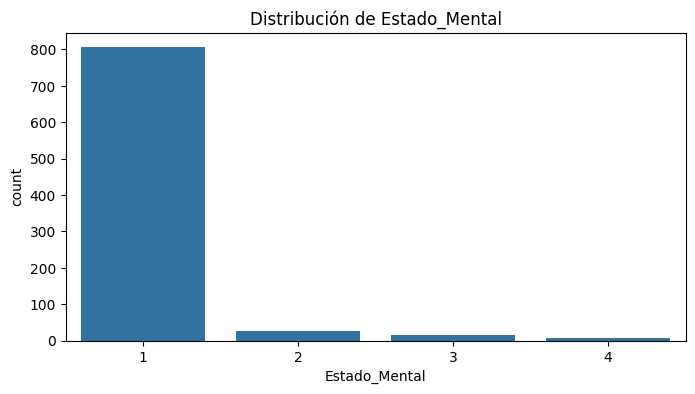

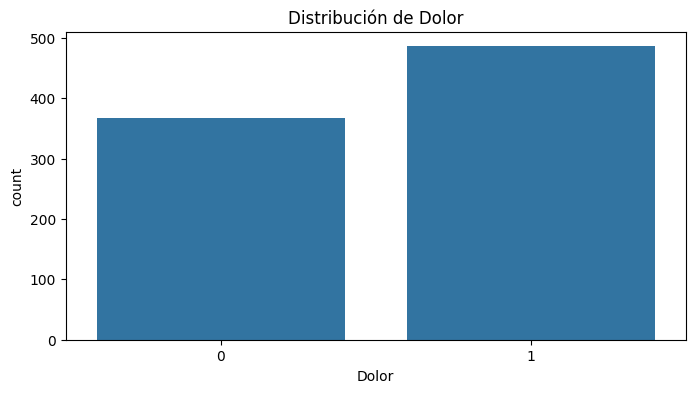

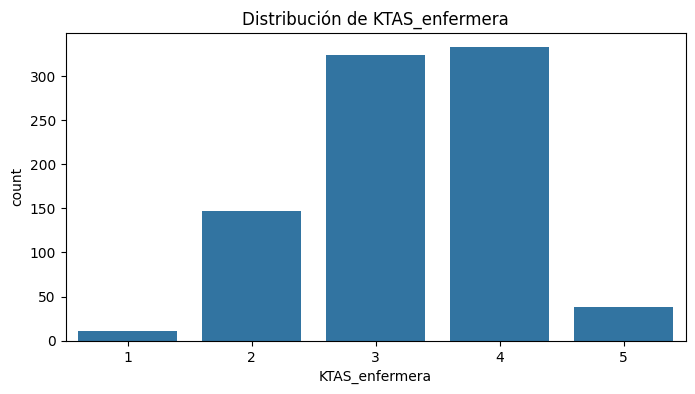

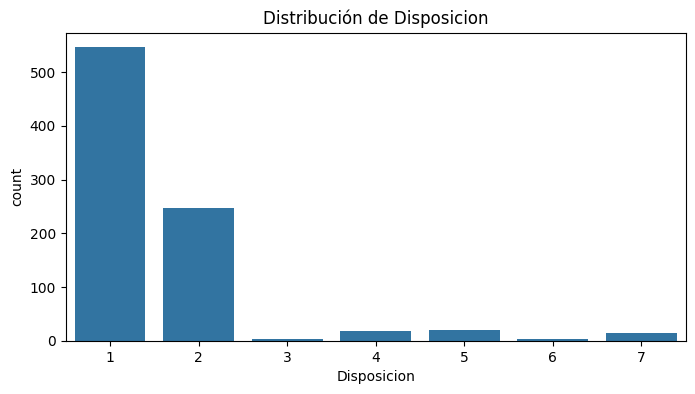

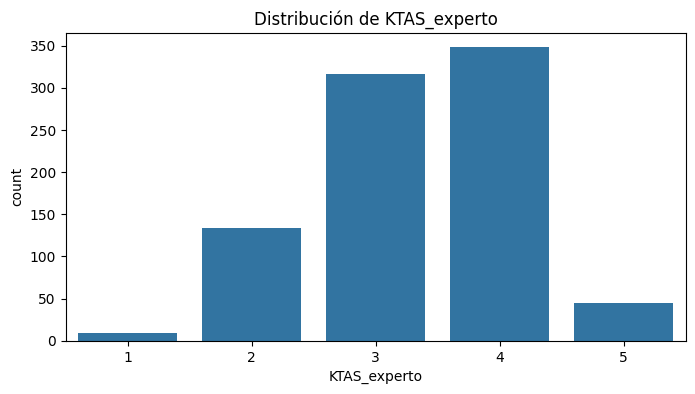

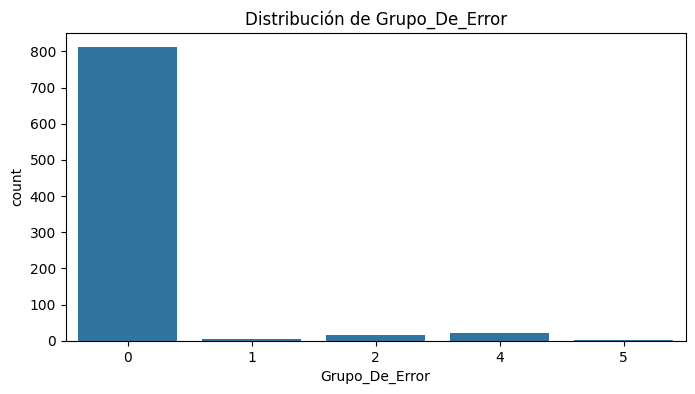

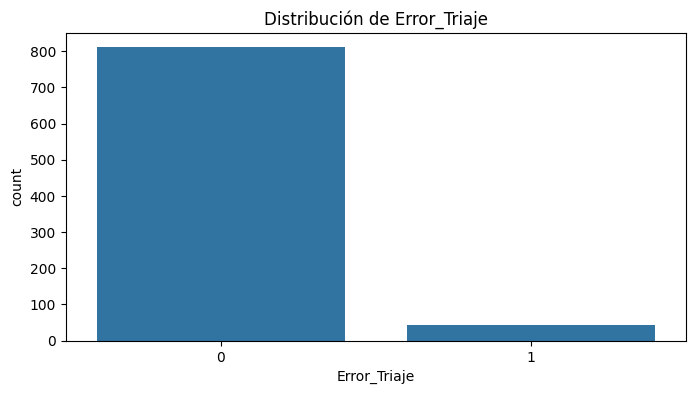

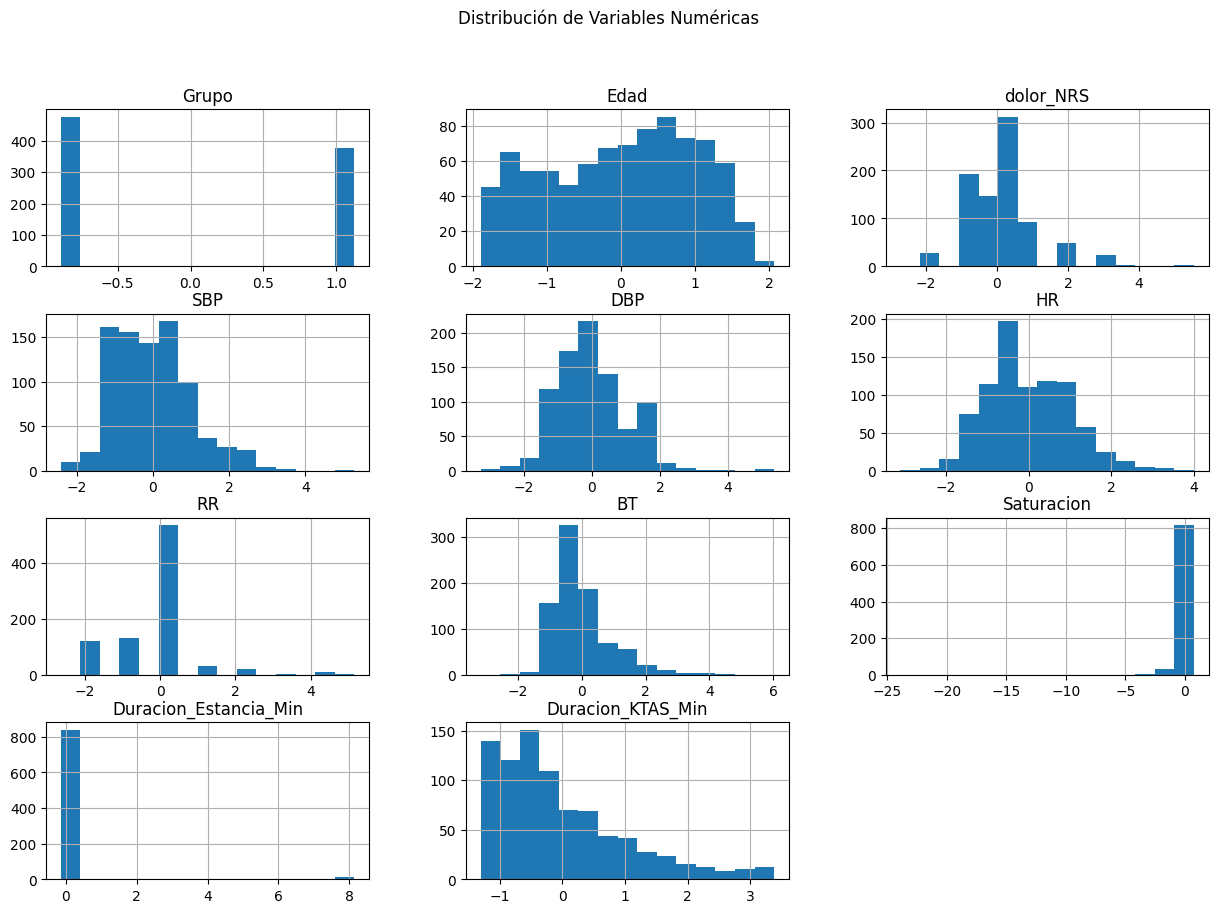

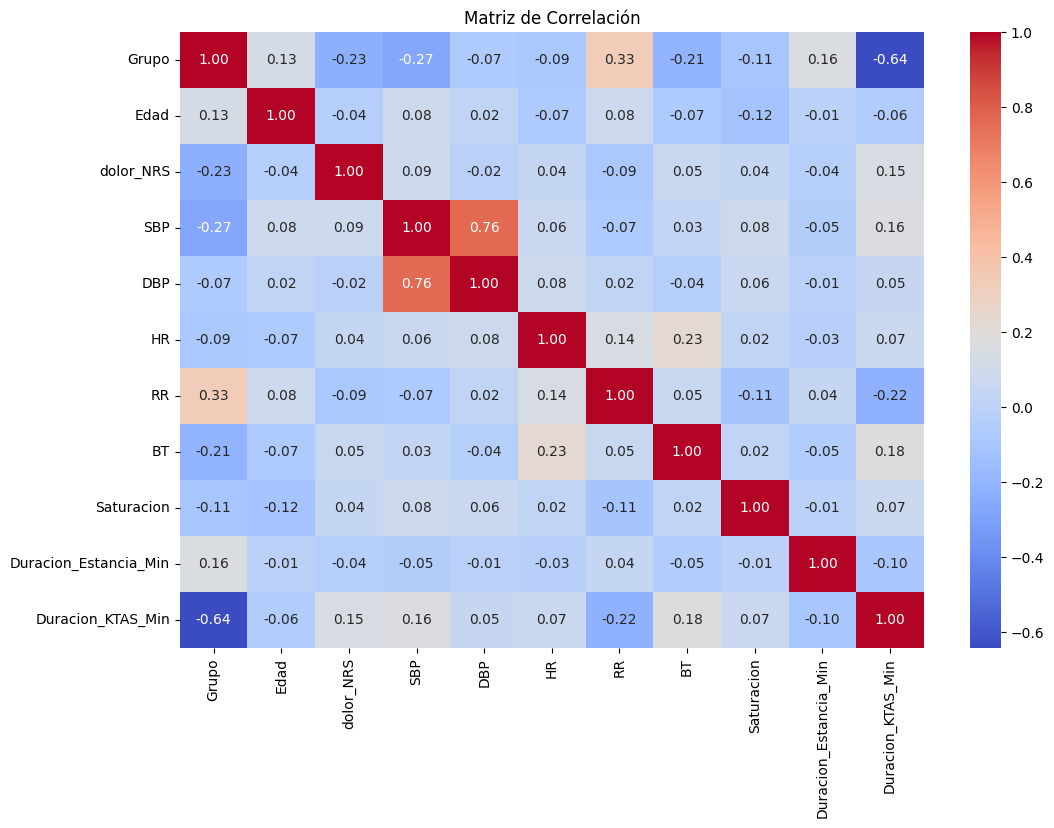

In [166]:

# -----------------------------------------
# 4. Visualización de los Datos
# -----------------------------------------

# Visualización de variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df_medical)
    plt.title(f"Distribución de {var}")
    plt.show()

# Histograma de variables numéricas
df_medical[numeric_vars].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

# Matriz de correlación para variables numéricas
corr_matrix = df_medical[numeric_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


### Selección de Variables para el Modelo
